<a href="https://colab.research.google.com/github/HosseinEyvazi/Supervised-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification VS Clustering(unsupervised)
unsupervised has not got a label -> therefore we have to segment (or ...) datas

# Classification
Tasks :
*   Binary classification (one-class classification)
*   Multi-class classification



# Logistic Regression

## Overview
- Logistic Regression is **a regression model used for classification tasks**.
- It applies a **linear regression** followed by a **Sigmoid function** to predict probabilities.

## Loss Function
- Logistic Regression aims to minimize the **Cross-Entropy Loss** to optimize predictions.

## Multi-Class Classification
- Logistic Regression, by default, is designed for **binary classification** (one-vs-one).  
- To extend it for **multi-class classification**, we use techniques like:
  1. **One-vs-Rest (OvR):** Train one binary classifier per class.
  2. **Softmax Function:** Generalizes the sigmoid function for multi-class problems.

### Loss Function for Multi-Class
- The loss function for multi-class classification is based on the **Categorical Cross-Entropy**, which minimizes the error across all classes.

### Important Note About softmax, OVO ,OVA
- **Softmax**: A function to convert logits into probabilities, often used with cross-entropy loss.
- **OVO (One-Vs-One)**: A multi-class classification strategy using pairwise binary classifiers.
- **OVR/OVA (One-Vs-Rest/One-Vs-All)**: A multi-class classification strategy using one binary classifier per class.
- **Cross-Entropy**: A loss function used to measure the difference between predicted and true probability distributions.



### (OVO), (OVA) and Multinomial classification strategies:

| **Aspect**                           | **One-Vs-One (OVO)**                                                                                                            | **One-Vs-All (OVA)**                                                                                                        | **Multinomial (Softmax)**                                                                                                                      |
| ------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**                       | Trains a separate classifier for every pair of classes.                                                                         | Trains a separate classifier for each class against all others.                                                             | Trains a single model to predict all classes simultaneously using softmax.                                                                     |
| **Number of Classifiers**            | $\frac{n(n-1)}{2}$ classifiers for $n$ classes.                                                                                 | $n$ classifiers for $n$ classes.                                                                                            | 1 classifier with multi-class output.                                                                                                          |
| **Computational Complexity**         | Higher, especially as the number of classes increases.                                                                          | Lower and scales linearly with the number of classes.                                                                       | Moderate, depends on number of classes and dataset size but usually more efficient than OVO.                                                   |
| **Training Time**                    | Longer due to the larger number of classifiers.                                                                                 | Generally faster since fewer classifiers are trained.                                                                       | Usually faster than OVO, can be slower than OVA depending on solver and data.                                                                  |
| **Prediction Time**                  | Can be slower due to aggregating results from multiple classifiers.                                                             | Typically faster as only one classifier per class is evaluated.                                                             | Fastest, as prediction is done by a single softmax function.                                                                                   |
| **Suitability**                      | Best for problems with a smaller number of classes.                                                                             | Suitable for problems with a large number of classes.                                                                       | Best for problems where classes are mutually exclusive and naturally multiclass.                                                               |
| **Performance with Imbalanced Data** | Often handles imbalanced data better since each classifier deals with balanced pairwise classes.                                | May struggle with imbalanced data as some classifiers have many negative samples.                                           | Can be sensitive to class imbalance unless handled with class weights or sampling.                                                             |
| **Handling of Overlapping Classes**  | Can better distinguish between specific pairs of overlapping classes.                                                           | May have difficulty distinguishing classes with significant overlap.                                                        | Learns decision boundaries simultaneously, often performs better with overlapping classes.                                                     |
| **Voting Mechanism**                 | Uses majority voting from all pairwise classifiers to decide the final class.                                                   | Selects the class with the highest confidence score from all classifiers.                                                   | No voting needed — predicts class probabilities directly via softmax.                                                                          |
| **Advantages**                       | - Better performance in multi-class scenarios.<br>- Effective with overlapping classes.<br>- Can handle imbalanced data better. | - Simpler and faster to implement.<br>- Requires fewer classifiers.<br>- Easier to interpret individual classifier outputs. | - Native multiclass modeling.<br>- Joint optimization of all classes.<br>- Often better calibrated probabilities.                              |
| **Disadvantages**                    | - Computationally intensive with many classes.<br>- More complex to aggregate results.                                          | - May not perform as well with highly overlapping classes.<br>- Potential issues with class imbalance.                      | - Requires solver that supports multinomial loss.<br>- Can be slower on very large datasets.<br>- May need careful tuning for imbalanced data. |



## References
- Learn more about extending Logistic Regression for multi-class classification:  
  [Multi-Class Logistic Regression](https://chatgpt.com/share/67766d57-07c4-800f-addf-a2fad1c559f0)


# Decision Tree, Random Forest, XGBoost, and LightGBM Theory

## 1. Decision Tree

### **What is a Decision Tree?**
A **Decision Tree** is a supervised learning algorithm used for both **classification** and **regression** tasks. It models decisions and their possible consequences as a tree-like structure.

### **How It Works**
- **Nodes:**
  - **Root Node:** The topmost node representing the entire dataset.
  - **Decision Nodes:** Nodes that split the data based on feature values.
  - **Leaf Nodes:** Terminal nodes that provide the final output or prediction.
  
- **Splitting Criteria:**
  - **Classification:** Uses metrics like **Gini Impurity**, **Entropy** (Information Gain).
  - **Regression:** Uses **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**. \

  important note : How are MSE and MAE as criteria? we compute the mean of a node and compute the MSE or MAE of each datapoint of a node and their mean. lower MSE, MAE, SSE ,... shows that datapoints are near to each other. so this is a good splitting criteria candidate.

- **Building the Tree:**
  1. Start at the root node with the entire dataset.
  2. Select the best feature to split the data based on the chosen criteria.
  3. Repeat the process recursively for each child node until stopping conditions are met (e.g., maximum depth, minimum samples).

### **Advantages**
- **Interpretability:** Easy to visualize and understand.
- **No Need for Feature Scaling:** Works with both numerical and categorical data.
- **Handles Non-linear Relationships:** Can capture complex patterns.

### **Disadvantages**
- **Overfitting:** Prone to creating overly complex trees that don't generalize well.
- **Bias Towards Dominant Features:** Can favor features with more levels.
- **Instability:** Small changes in data can lead to different tree structures.

### **Use Cases**
- Customer segmentation
- Risk assessment
- Medical diagnosis \
 [an example of Decision Tree Regressor](https://chatgpt.com/share/67a5de96-9cb4-8000-b3a3-7a1b1873054a)
---

## 2. Random Forest

### **What is a Random Forest?**
**Random Forest** is an ensemble learning method that builds multiple **Decision Trees** and merges their results to improve **classification** and **regression** accuracy.

### **How It Works**
- **Bagging (Bootstrap Aggregating):**
  - Generate multiple subsets of the original dataset using random sampling WITH REPLACEMENT.
  
- **Tree Construction:**
  - Build a Decision Tree for each subset.
  - At each split, randomly select a subset of features to consider, enhancing diversity among trees.
  
- **Aggregation:**
  - **Classification:** Majority voting across all trees.
  - **Regression:** Averaging the predictions of all trees.


Note:it computes the mean of the related leaf! therefore we have got the mean computation in 2 styles for random forest REGRESSOR (one for decision tree itslef)
### **Advantages**
- **Reduces Overfitting:** Averaging multiple trees mitigates overfitting inherent in individual Decision Trees.
- **Handles High Dimensionality:** Effective with large numbers of features.
- **Robust to Noise:** Can manage noisy data and outliers.

### **Disadvantages**
- **Less Interpretable:** Difficult to visualize compared to a single Decision Tree.
- **Computationally Intensive:** Requires more resources to build and predict.
- **Slower Predictions:** Aggregating multiple trees can be time-consuming.

### **Use Cases**
- Feature selection
- Predictive analytics
- Financial forecasting
[an example of Random Forest Regressor](https://chatgpt.com/share/67a5de96-9cb4-8000-b3a3-7a1b1873054a)
---

## 3. XGBoost

The main idea behind XGBoost (Extreme Gradient Boosting) is to build a strong predictive model by combining the predictions of several "weak" models. It does this sequentially, where each new model corrects the errors made by the previous ones. Think of it as a team of students learning a topic. The first student tries to answer a question, and the teacher points out the mistakes. The next student then focuses on those specific mistakes to improve the answer. This process continues until the team's collective answer is very accurate.



### **What is XGBoost?**
**XGBoost** (**Extreme Gradient Boosting**) is a powerful and efficient implementation of the **Gradient Boosting** framework, designed for speed and performance in machine learning competitions.

### **How It Works**
- **Gradient Boosting:**
  - Builds models sequentially, where each new model attempts to correct the errors of the previous ones.
  - Optimizes a loss function using gradient descent.
  
- **Regularization:**
  - Incorporates **L1** and **L2** regularization to prevent overfitting.
  
- **Tree Pruning:**
  - Uses **Max Depth** and **Min Child Weight** to control tree complexity.
  
- **Handling Missing Values:**
  - Automatically learns the best direction to handle missing data.
  
- **Parallel Processing:**
  - Efficiently utilizes hardware by parallelizing tree construction.

### **Advantages**
- **High Performance:** Often outperforms other algorithms in accuracy.
- **Flexibility:** Supports various objective functions for classification and regression.
- **Feature Importance:** Provides insights into feature relevance.
- **Handles Missing Data:** Automatically manages missing values without imputation.

### **Disadvantages**
- **Complexity:** More parameters to tune, which can be challenging.
- **Computationally Intensive:** Can be resource-heavy with large datasets.
- **Less Interpretable:** Harder to interpret compared to simpler models.

### **Use Cases**
- Ranking systems
- Click-through rate prediction
- Fraud detection

---

## 4. LightGBM

### **What is LightGBM?**
**LightGBM** (**Light Gradient Boosting Machine**) is a gradient boosting framework that uses **tree-based learning algorithms**. It is designed to be highly efficient, scalable, and capable of handling large-scale data.

### **How It Works**
- **Gradient Boosting:**
  - Similar to XGBoost, builds models sequentially to minimize the loss function.
  
- **Leaf-wise Growth:**
  - Grows trees by selecting the leaf with the maximum loss to split, leading to deeper and more complex trees.
  
- **Histogram-based Decision Making:**
  - Bins continuous features into discrete bins to speed up training and reduce memory usage.
  
- **Exclusive Feature Bundling (EFB):**
  - Combines mutually exclusive features to reduce the dimensionality.
  
- **Support for Categorical Features:**
  - Directly handles categorical features without the need for one-hot encoding.

### **Advantages**
- **Speed and Efficiency:** Faster training and lower memory consumption compared to other boosting algorithms.
- **Handles Large Datasets:** Scales well with large volumes of data.
- **High Accuracy:** Comparable to or better than XGBoost in many cases.
- **Better Handling of Categorical Features:** Simplifies preprocessing steps.

### **Disadvantages**
- **Overfitting Risk:** Leaf-wise growth can lead to overfitting if not properly regularized.
- **Complexity:** Requires careful tuning of parameters to achieve optimal performance.
- **Less Interpretable:** Similar to other boosting methods, harder to interpret than simpler models.

### **Use Cases**
- Real-time predictions
- Large-scale classification and regression tasks
- Recommender systems

---

## 5. Support Vector Machine (SVM)

### **What is SVM?**
**Support Vector Machine (SVM)** is a supervised learning algorithm used for **classification** and **regression**. It finds the best decision boundary (**hyperplane**) that maximizes the margin between different classes.

### **How SVM Finds the Best Decision Boundary**
SVM aims to find the **optimal hyperplane** that **best separates** different classes in the dataset.

1. **Hyperplane:** A decision boundary that separates data points.  
2. **Margin Maximization:** The larger the margin, the better the generalization.  
3. **Kernel Trick for Non-Linearity:** Transforms data into a higher-dimensional space when necessary.  

### **Multi-Class Classification with SVM**
SVM is naturally a **binary classifier**, but it can handle multi-class classification using:  
- **One-vs-One (OvO):** Trains an SVM for every class pair.  
- **One-vs-All (OvA):** Trains `N` SVM models, one per class vs. all others.  

### **SVM for Regression (SVR)**
- **Support Vector Regression (SVR)** fits a function within a **tolerance margin (ε-tube)**, meaning it **ignores small errors** while minimizing large ones.  
- **Key Idea:** Instead of minimizing absolute error, SVR allows some flexibility by **not penalizing predictions within the ε margin**.

### **Loss Function: Hinge Loss**
For a sample `(x, y)`, where `y` is `+1` or `-1`:

  - If correctly classified and outside the margin: **Loss = 0**  
  - If misclassified or inside the margin:  
    **Loss = max(0, 1 - y * f(x))**, where `f(x) = w * x + b` is the decision function.

### **Hyperparameters in SVM**
- **C (Regularization):** Controls the trade-off between margin size and classification accuracy.  
- **Kernel:** Defines how data is transformed (linear, RBF, polynomial, etc.).  
- **Gamma (γ):** Determines how much influence each point has in non-linear kernels.  
- **Epsilon (ε, in SVR):** Defines the **tolerance margin**, where small errors are ignored.  

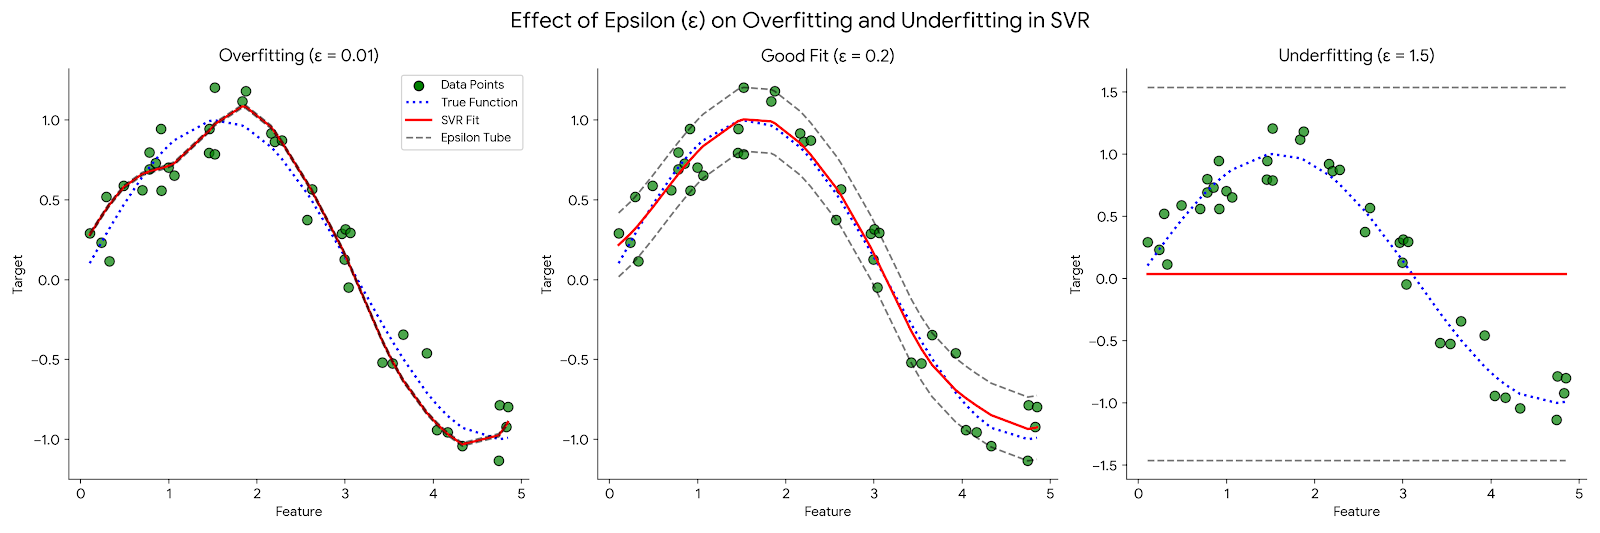

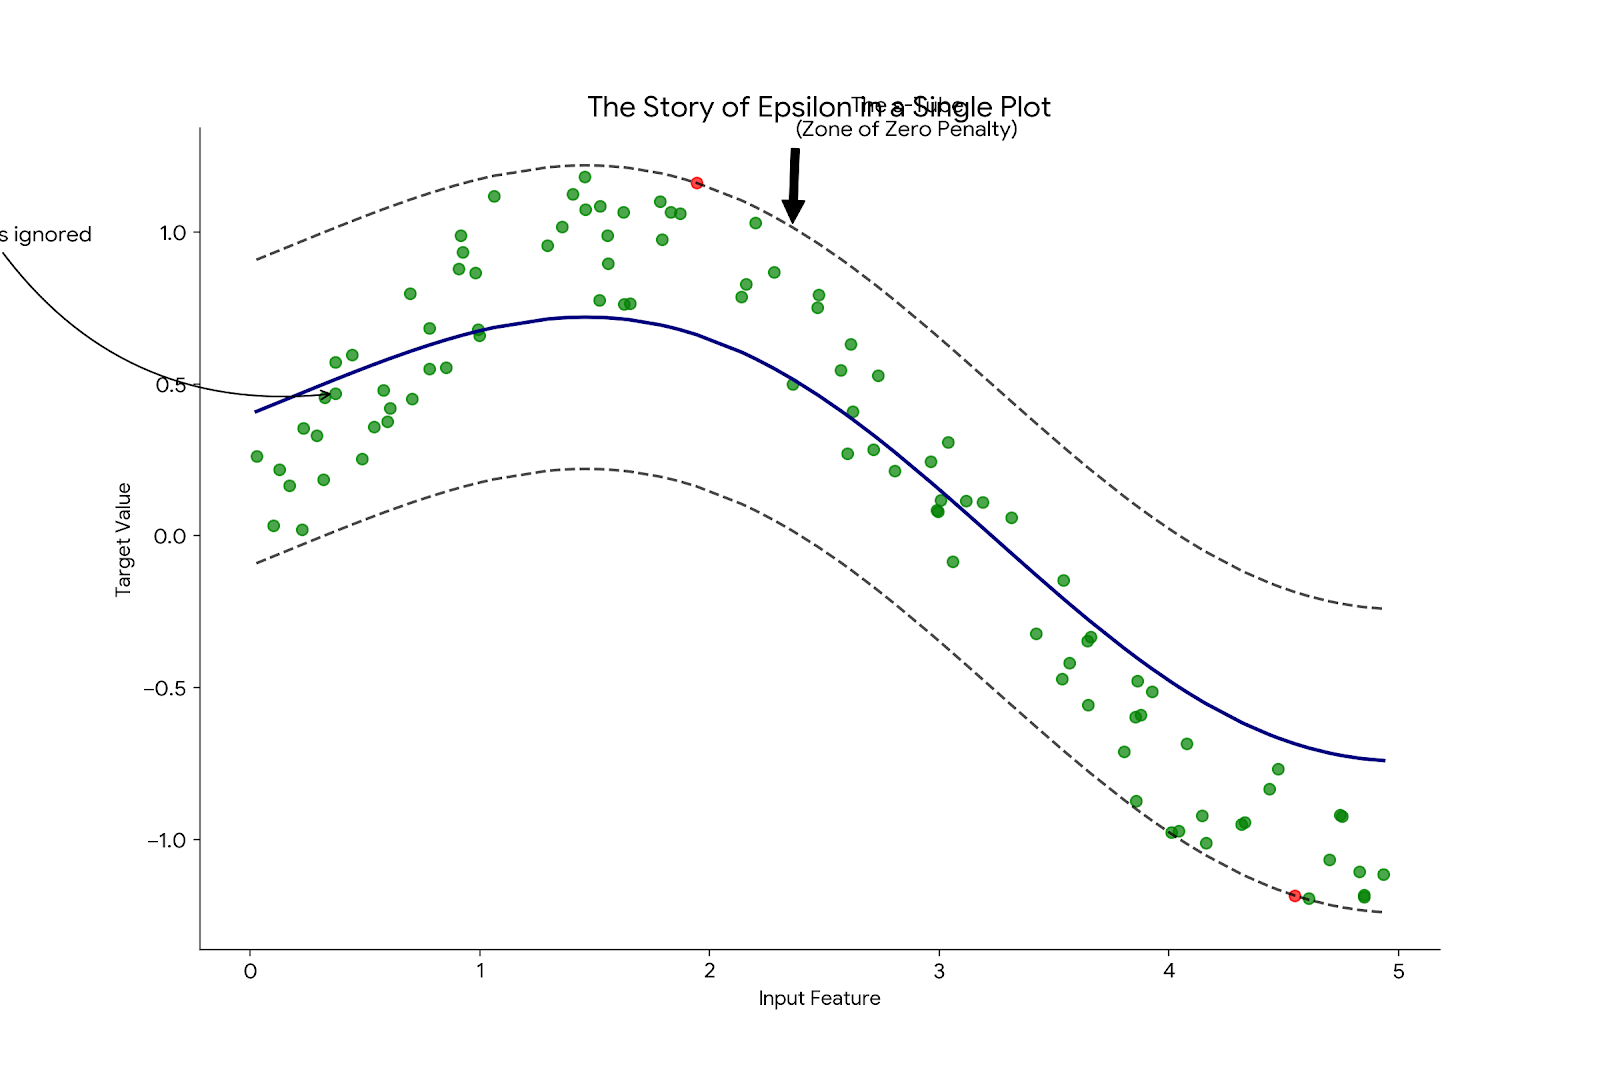


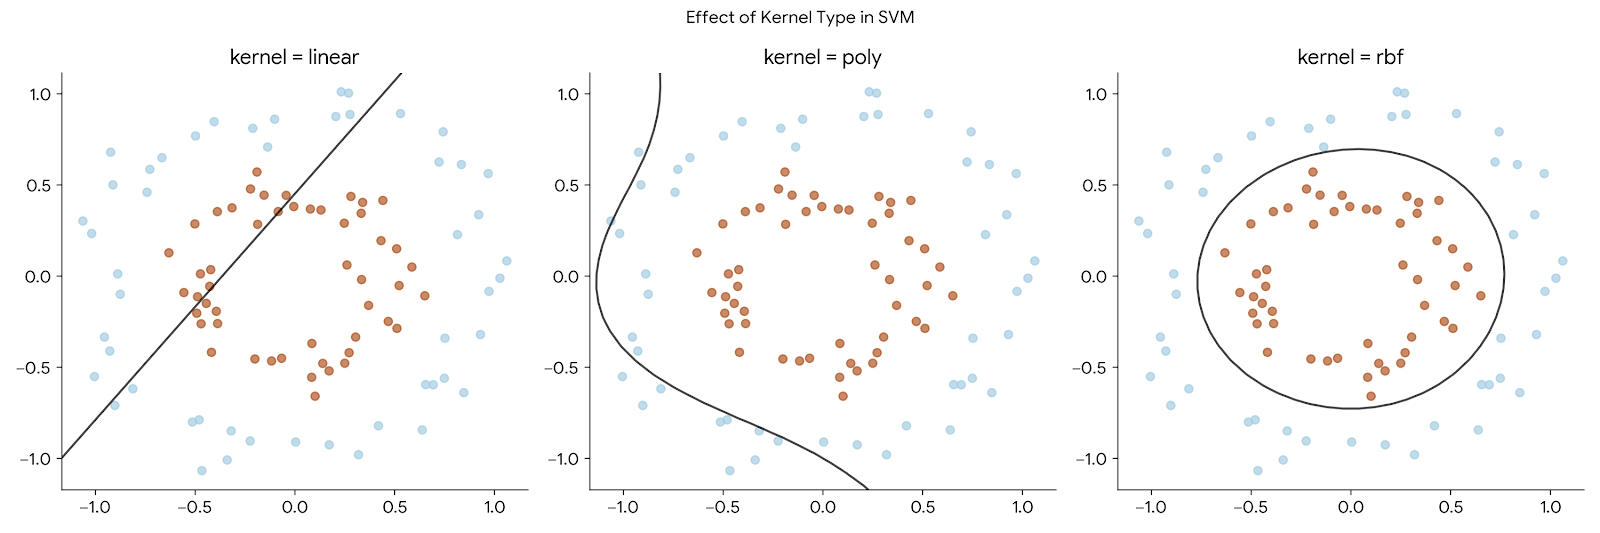

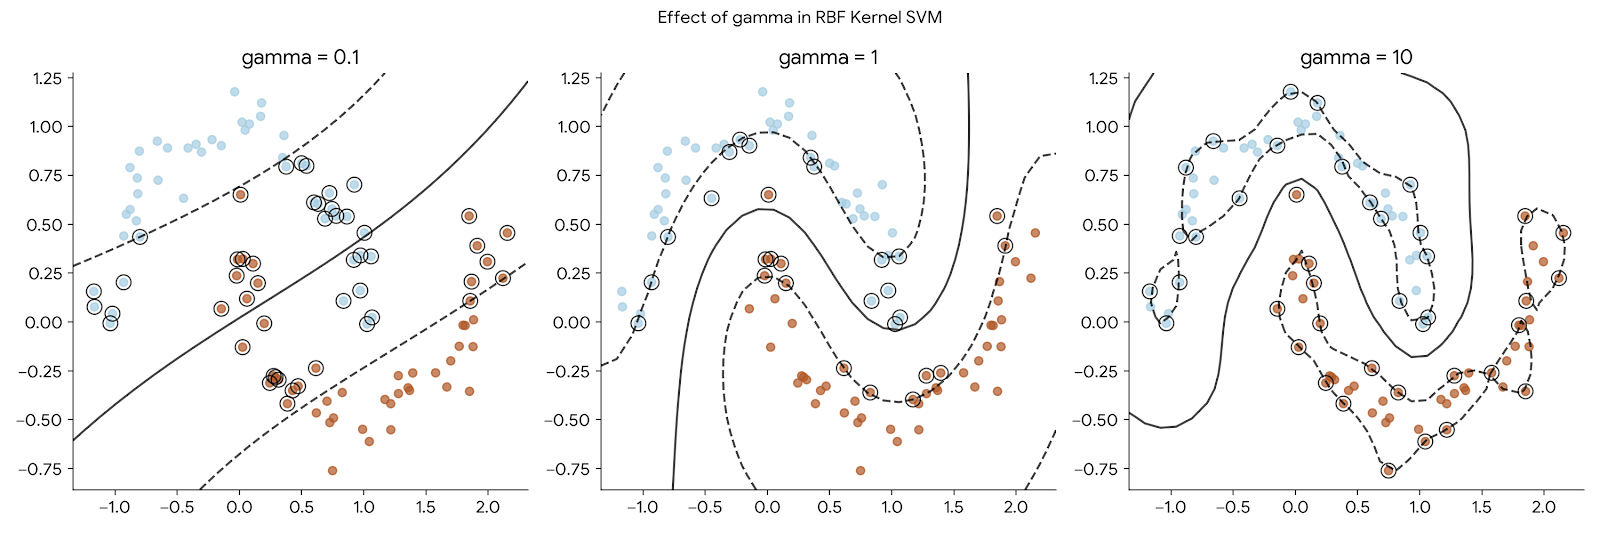

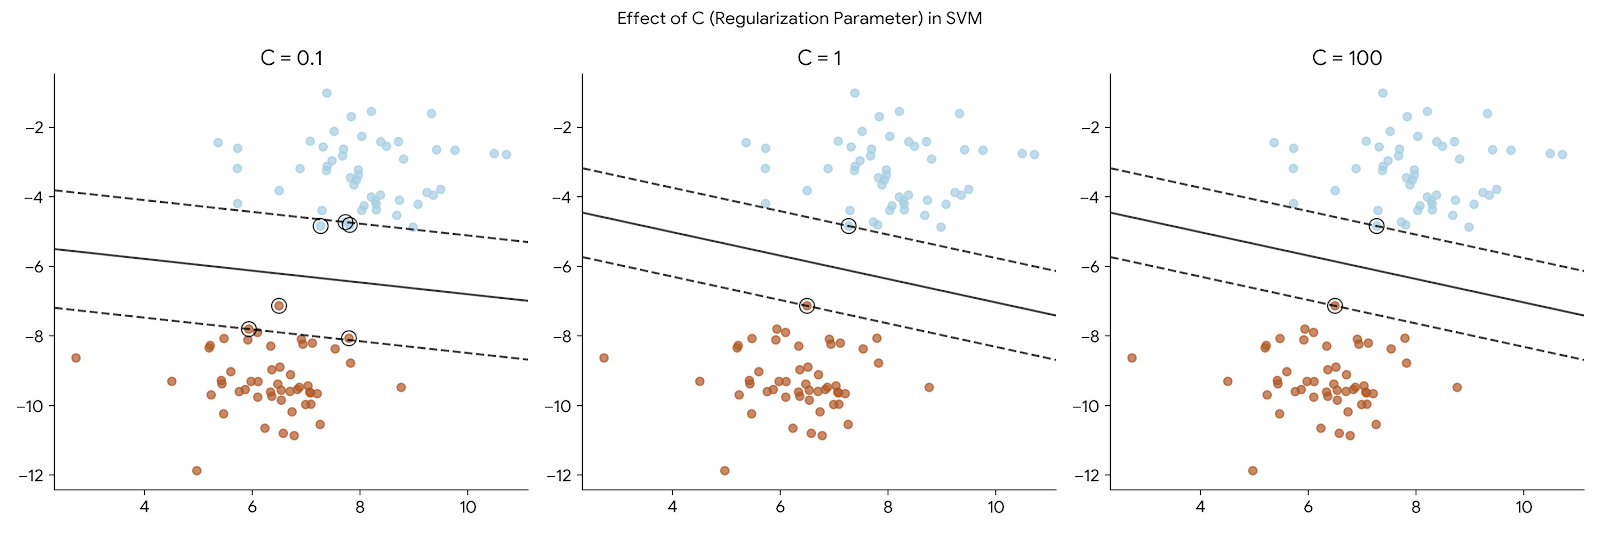




### **Advantages**
✔ Works well with **high-dimensional data**  
✔ **Prevents overfitting** with proper regularization  
✔ Can **handle non-linear** relationships using kernels  

### **Disadvantages**
❌ **Slow training** for large datasets  
❌ **Requires careful tuning** of parameters  
❌ **Less interpretable** than simpler models  

### **Use Cases**
- Text classification (e.g., spam filtering)  
- Image recognition  
- Bioinformatics (e.g., protein classification)  

---

# Summary

- **Decision Trees** are intuitive models ideal for understanding data but prone to overfitting.
- **Random Forests** enhance Decision Trees by ensembling multiple trees to improve accuracy and robustness.
- **XGBoost** offers high performance through optimized gradient boosting with regularization and parallel processing.
- **LightGBM** provides efficient and scalable gradient boosting with advanced techniques like leaf-wise growth and histogram-based decision making.

Each algorithm has its strengths and is chosen based on the specific requirements of the task, such as dataset size, computational resources, and the need for interpretability.

[Learn more](https://chatgpt.com/share/6784f9ce-186c-8000-a69b-853caa17827d)




# **Decision Tree Criteria**

## **Introduction**
Decision Trees are powerful models used in classification and regression. A key part of their learning process is choosing the best way to split the data. This is done using criteria that measure how "pure" or "impure" a node is. The two main criteria used are **Gini impurity** and **Entropy (Information Gain)**.

---

## **1. Gini Impurity** (Used in CART Algorithm)
### **What is it?**
Gini impurity measures how mixed the classes are in a node. Lower Gini means purer groups.

### **Formula**
Gini = 1 - (p1^2 + p2^2 + ... + pn^2)

Where:
- `p1, p2, ..., pn` are the proportions of each class in the node.

### **How does it work?**
- If all samples in a node belong to the same class, Gini impurity is **0** (perfectly pure).
- If the classes are evenly mixed, Gini impurity is higher.
- The tree **chooses the split** that results in the **lowest Gini impurity** after the split.

### **Key Takeaway:**
Gini impurity is **fast** and works well in most cases.


---

## **2. Entropy & Information Gain** (Used in ID3, C4.5)
### **What is Entropy?**
Entropy measures the uncertainty or disorder in a node. Higher entropy means more randomness.

### **Formula **
Entropy = - (p1 * log2(p1) + p2 * log2(p2) + ... + pn * log2(pn))
Where:
- `p1, p2, ..., pn` are the proportions of each class in the node.
- `log2` is the logarithm with base 2.

### **How does Information Gain work?**
- The tree calculates **entropy before and after a split**.
- It finds how much **uncertainty is reduced** after the split (this is called **Information Gain**).

### **Information Gain Formula**
Information Gain = Entropy(before) - Weighted Entropy(after)

- The tree chooses the split that **maximizes Information Gain**.

### **Key Takeaway:**
Entropy is **more precise** but slightly **slower** than Gini.

---

## **Gini vs. Entropy: Which One to Use?**

| Criterion  | Speed  | Best For |
|------------|--------|-----------|
| **Gini**   | Faster  | Most cases (default in sklearn) |
| **Entropy** | Slower  | When you want a more precise split |

👉 **Tip:** If you’re unsure, just go with **Gini impurity**! 🚀

---

## **Conclusion**
Decision Trees automatically select the best feature and split using either **Gini impurity** or **Entropy**. Both methods help the tree learn better and make smarter decisions! 🎯





### Model performance
In regression : MSE , MAE , RMSE , ...   
In clustering : NMI , ARI , Silhouette , Rand , ...
In classification : [methods](https://chatgpt.com/share/67767aaf-fa10-800f-8a14-e1dbbc5885c1)



Note : [That is why](https://chatgpt.com/share/677676af-0bc0-800f-b610-51c8c37fe0ba) False Negative , Flase positve importance are not same. \
Confusion matrix : is matrix to show true positive and ... with more details




In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC # support vector classifier
from sklearn.svm import SVR # support vector regressor
from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
# from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report , confusion_matrix , recall_score , f1_score
import seaborn as sns

from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings("ignore")


In [ ]:
X = load_breast_cancer().data
y = load_breast_cancer().target

X = pd.DataFrame(X , columns = load_breast_cancer().feature_names )
y = pd.DataFrame(y , columns = ['target'] )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=42 , test_size=.10)

In [ ]:
ssc = StandardScaler()
X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)


In [ ]:
# ! pip install --upgrade scikit-learn xgboost

xgbc = RandomForestClassifier()
param_distributions = {'n_estimators':range(20,200) , 'max_depth':range(20,500)}
rscv = RandomizedSearchCV(xgbc , param_distributions=param_distributions , cv=50)
rscv.fit(X_train , y_train)
# xgbc.fit(X_train , y_train)

RandomizedSearchCV(cv=50, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(20, 500),
                                        'n_estimators': range(20, 200)})

In [ ]:
y_pred = rscv.predict(X_test)
f1_score(y_test , y_pred)

0.975

f1 score is avg of precision and recall that is why this is an imoprtant score

Support vector machine classification

In [ ]:


svc = SVC()
param_distributions = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7),
    'degree': [2, 3, 4],
    'coef0': np.linspace(-1, 1, 5)
}
rscv_svc = RandomizedSearchCV(svc, param_distributions=param_distributions, cv=20 , random_state=42) # use lower cv values for faster training, it takes way too long with cv=50
rscv_svc.fit(X_train, y_train)

y_pred_svc = rscv_svc.predict(X_test)
f1_svc = f1_score(y_test, y_pred_svc)
print(f"SVC F1 Score: {f1_svc}")



SVC F1 Score: 0.975


### LogisticRegression

In [ ]:


lr = LogisticRegression()
param_distributions = {
    'C': np.logspace(-3, 3, 20),
    'penalty': ['l1', 'l2' , 'elasticnet' , 'None'],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'saga' ,'sag'],
}

rscv_lr = RandomizedSearchCV(lr, param_distributions=param_distributions, cv=20 , random_state=42) # use lower cv values for faster training, it takes way too long with cv=50
rscv_lr.fit(X_train, y_train)

y_pred_lr = rscv_lr.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)
classification_report(y_test , y_pred_lr)
print(f"Logistic Regression F1 Score: {f1_lr}")

Logistic Regression F1 Score: 0.9876543209876543
